# <font color='#FFE15D'>**Week 3: Multiple Linear Regression 📈**</font>

## **🔸 Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# import sklearn
# from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, SGDRegressor

## **🔸 Data**

### Load data

In [2]:
df = pd.read_csv('data-practice/train_advertising_data.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,0.016886,0.440321,-0.837652,0.255143
1,1,-1.209628,1.067664,1.528850,-0.550571
2,2,0.175407,-1.360761,-1.029652,-0.608122
3,3,-1.501214,0.952988,0.617970,-1.221999
4,4,-1.420218,-0.719927,-0.355422,-1.337101
...,...,...,...,...,...
155,155,1.119592,0.777602,-1.163605,1.348611
156,156,-0.946969,-0.726672,0.524203,-0.761591
157,157,1.691194,1.364471,1.805686,2.403712
158,158,0.936772,-1.306796,-0.815327,-0.416285


### Split x & y

In [9]:
train_set = np.array(df)[: , 1:]


x_train = train_set[: , 0:3]
y_train = train_set[: , 3]

x_train.shape , y_train.shape

((160, 3), (160, 1))

### Visualize

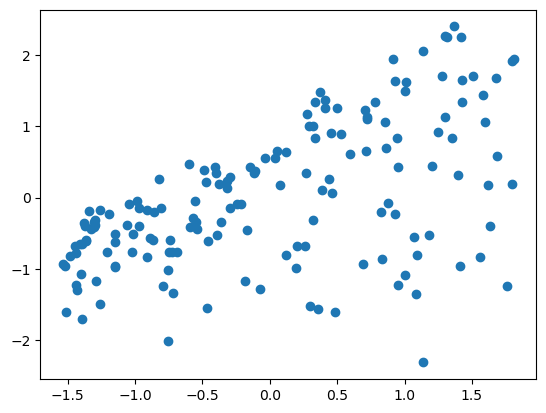

In [18]:
plt.scatter(x_train[: , 1] , y_train)

## **🔸 Model**

In [19]:
n , m = x_train.shape

#x = x_train[0 , :]
x_train_aug = np.hstack((np.ones((n , 1)) , x_train))
#print(x_train_aug)

w = np.random.randn(m + 1)   ## the number of features is m+1 , m=5
#print(w)

y_hat =0
for xi , wi in zip(x_train_aug.T , w):
   y_hat += xi*wi
y_hat

array([ 0.70394231, -0.10789409,  0.90586925, -0.49692346, -0.48216641,
        0.54149088,  1.87076901,  0.79464889, -0.23295063,  1.52864042,
        1.92181354,  1.18355969,  0.52979733,  0.80849932, -0.31529412,
        0.51288066,  1.35247492,  0.16231486, -0.74624016, -0.05648306,
        0.48052201,  0.11465474, -0.3783875 ,  0.91922585,  1.42246655,
        2.0940068 ,  0.86439852,  0.13050812, -0.28356954,  1.89201486,
        1.77197513,  0.84283219, -0.4408749 ,  0.14577965, -0.37316848,
        2.85712716,  1.2151532 ,  0.93939041,  0.01242837,  0.89006981,
        1.76238242,  1.46498171,  0.9072363 , -0.08530688, -0.18230344,
        2.3155977 , -0.8519551 ,  1.7703023 ,  2.22896808,  0.35074196,
        1.0443708 ,  0.63971117,  2.19634381, -0.02687293, -0.341032  ,
        0.42390893,  0.25281143,  0.48917432,  0.0424027 ,  1.8615423 ,
        0.2602282 ,  1.45338521,  0.02925835,  1.53188222, -0.096013  ,
        1.23226754,  1.83332406,  2.40371833, -0.37249144, -0.49

In [20]:
y_hat.shape

(160,)

### Define model

In [48]:
def multiple_linear_regression(x, w):
    y_hat = 0
    for xi, wi in zip(x.T, w):
        y_hat += xi*wi
    return y_hat

### Pass data to the model

#### - Initialize weight and bias

In [43]:
w = np.random.randn(m+1)
w.shape

(6,)

#### - Get model's output

In [47]:
x_train_aug = np.hstack((np.ones((n,1)) , x_train))
x_train_aug.shape

(3500, 6)

In [51]:
y_hat = multiple_linear_regression(x_train_aug , w)
y_hat.shape

(3500,)

## **🔸 Train**

<img src="imgs/train.png" alt="string indexing" width=500 align="center" />

### Functions

In [21]:
def multiple_linear_regression(x, w):
    y_hat = 0
    for xi, wi in zip(x.T, w):
        y_hat += xi*wi
    return y_hat

In [22]:
def mse(y , y_hat):
    loss = np.mean((y_hat - y)**2)
    return loss

In [30]:
def gradient(x , y , y_hat):
    grads = []
    for xi in x.T:
        grads.append(2*np.mean(xi * (y_hat - y)))
    grads = np.array(grads) 
    return grads    

In [31]:
def gradient_descent(w , eta , grads):
    w -= eta * grads
    return w 

### Load Train Dataset

In [24]:
df = pd.read_csv('data-practice/train_advertising_data.csv')
train_set = np.array(df)[:, 1:]

x_train = train_set[:, 0:3]
y_train = train_set[:, 3]

n, m = x_train.shape
x_train = np.hstack((np.ones((n, 1)), x_train))
x_train.shape

(160, 4)

In [26]:
x_train.shape , y_train.shape

((160, 4), (160,))

### Initialization

In [35]:
w = np.random.randn(m+1)

eta = 0.005
n_epochs = 2000

### Main

In [36]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = multiple_linear_regression(x_train, w)
   

    # loss
    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(x_train, y_train, y_hat)
    #print(grads)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    #print(w)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w}')

Epoch=99, 	 E=0.5949,	 w=[-0.59130941  0.80167905  0.14522421  0.01284404]
Epoch=199, 	 E=0.1748,	 w=[-0.21643837  0.78649456  0.36137735  0.0568412 ]
Epoch=299, 	 E=0.1192,	 w=[-0.07922344  0.77630139  0.4403922   0.04346922]
Epoch=399, 	 E=0.1108,	 w=[-0.02899834  0.77151676  0.47358347  0.02708199]
Epoch=499, 	 E=0.1092,	 w=[-0.01061433  0.76955873  0.48908071  0.01596748]
Epoch=599, 	 E=0.1089,	 w=[-0.00388519  0.76882194  0.49680905  0.00940798]
Epoch=699, 	 E=0.1089,	 w=[-0.0014221   0.76856488  0.50080505  0.00573109]
Epoch=799, 	 E=0.1088,	 w=[-5.20536288e-04  7.68483743e-01  5.02910075e-01  3.71484717e-03]
Epoch=899, 	 E=0.1088,	 w=[-1.90533116e-04  7.68462685e-01  5.04029437e-01  2.62029698e-03]
Epoch=999, 	 E=0.1088,	 w=[-6.97412826e-05  7.68460092e-01  5.04627509e-01  2.02895440e-03]
Epoch=1099, 	 E=0.1088,	 w=[-2.55275650e-05  7.68462030e-01  5.04947848e-01  1.71024064e-03]
Epoch=1199, 	 E=0.1088,	 w=[-9.34391437e-06  7.68464334e-01  5.05119656e-01  1.53867872e-03]
Epoch=1

### Learning curve

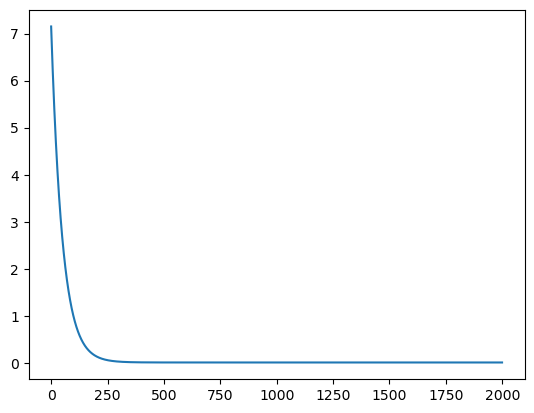

In [9]:
plt.plot(error_hist)

### Save model

In [37]:
np.save('multiple-linear-regression-weights-practice', w)

## **🔸 Test**

<img src="imgs/test.png" alt="string indexing" width=250 align="center" />

### Functions

In [38]:
def multiple_linear_regression(x, w):
    y_hat = 0
    for xi, wi in zip(x.T, w):
        y_hat += xi*wi
    return y_hat

In [39]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [40]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Load Test Dataset

In [41]:
df = pd.read_csv('data-practice/test_advertising_data.csv')
test_set = np.array(df)[:, 1:]

x_test = test_set[:, 0:3]
y_test = test_set[:, 3]

n, m = x_test.shape
x_test = np.hstack((np.ones((n, 1)), x_test))
x_test.shape

(40, 4)

### Load Trained Model

In [43]:
w = np.load('multiple-linear-regression-weights-practice.npy')
w

array([-3.01081770e-09,  7.68468616e-01,  5.05317475e-01,  1.34047375e-03])

### Evaluate

In [44]:
y_hat_test = multiple_linear_regression(x_test, w)

In [45]:
mae(y_test, y_hat_test)

np.float64(0.23240843944301823)

In [46]:
r2(y_test, y_hat_test)

np.float64(0.9085771115130269)

## **🔸 Vectorization**

<img src="imgs/train-vec.png" alt="string indexing" width=500 align="center" />     <img src="imgs/test-vec.png" alt="string indexing" width=250 align="center" />

### Functions

In [47]:
def multiple_linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [48]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss #, np.linalg.norm(y-y_hat)**2 / len(y), ((y_hat - y).T @ (y_hat - y)) / len(y)

In [49]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / x.shape[0]
    return grads

In [51]:
x_train.shape[0]

160

In [52]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [53]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [54]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Train

#### - Load Dataset

In [55]:
df = pd.read_csv('data-practice/train_advertising_data.csv')
train_set = np.array(df)[:, 1:]

x_train = train_set[:, 0:3]
y_train = train_set[:, [3]]

n, m = x_train.shape
x_train = np.hstack((np.ones((n, 1)), x_train))
x_train.shape, y_train.shape

((160, 4), (160, 1))

#### - Initialization

In [62]:
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.005
n_epochs = 2000

(4, 1)


#### - Main

In [63]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = multiple_linear_regression(x_train, w)

    # loss
    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=0.6874,	 w=[ 0.21187819  0.35099413 -0.09613067  0.41920479]
Epoch=199, 	 E=0.2337,	 w=[0.07755427 0.61608544 0.21564808 0.26143865]
Epoch=299, 	 E=0.1403,	 w=[0.02838737 0.71166834 0.35653667 0.1487164 ]
Epoch=399, 	 E=0.1173,	 w=[0.0103907  0.74687795 0.42655923 0.08199305]
Epoch=499, 	 E=0.1112,	 w=[0.00380333 0.76009553 0.46310465 0.04488705]
Epoch=599, 	 E=0.1095,	 w=[0.00139214 0.765149   0.48259283 0.02473541]
Epoch=699, 	 E=0.109,	 w=[5.09569009e-04 7.67118986e-01 4.93071094e-01 1.38896134e-02]
Epoch=799, 	 E=0.1089,	 w=[1.86518737e-04 7.67903973e-01 4.98719136e-01 8.07027201e-03]
Epoch=899, 	 E=0.1088,	 w=[6.82718902e-05 7.68224799e-01 5.01764393e-01 4.95014473e-03]
Epoch=999, 	 E=0.1088,	 w=[2.49897198e-05 7.68359772e-01 5.03405525e-01 3.27700185e-03]
Epoch=1099, 	 E=0.1088,	 w=[9.14704564e-06 7.68418396e-01 5.04289396e-01 2.37943849e-03]
Epoch=1199, 	 E=0.1088,	 w=[3.34811453e-06 7.68444724e-01 5.04765154e-01 1.89774043e-03]
Epoch=1299, 	 E=0.1088,	 w=[1.225518

### Learning curve

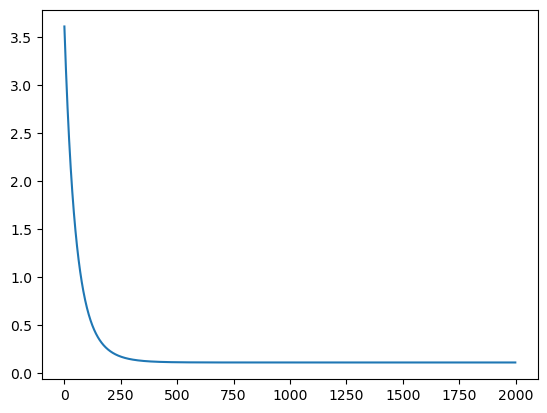

In [64]:
plt.plot(error_hist)

### Save model

In [65]:
np.save('multiple-linear-regression-weights-vec-prac', w)

### Test

In [66]:
df = pd.read_csv('data-practice/test_advertising_data.csv')
test_set = np.array(df)[:, 1:]

x_test = test_set[:, 0:3]
y_test = test_set[:, [3]]

n, m = x_test.shape
x_test = np.hstack((np.ones((n, 1)), x_test))
x_test.shape, y_test.shape

((40, 4), (40, 1))

In [67]:
y_hat_test = multiple_linear_regression(x_test, w)
y_hat_test.shape

(40, 1)

In [68]:
mae(y_test, y_hat_test)

np.float64(0.23240931918528887)

In [69]:
r2(y_test, y_hat_test)

np.float64(0.90857646116696)

## **🔸 Closed-form Solution**

$
\begin{align}
w &= (X^TX)^{-1} X^T y
\end{align}
$

In [70]:
df = pd.read_csv('data-practice/train_advertising_data.csv')
train_set = np.array(df)[:, 1:]

x_train = train_set[:, 0:3]
y_train = train_set[:, [3]]

n, m = x_train.shape
x_train = np.hstack((np.ones((n, 1)), x_train))
x_train.shape, y_train.shape

((160, 4), (160, 1))

In [71]:
X = x_train.copy()
y = y_train.copy()
X.shape, y.shape

((160, 4), (160, 1))

In [72]:
wc = np.linalg.inv(X.T @ X) @ X.T @ y
wc

array([[4.30211422e-16],
       [7.68468657e-01],
       [5.05318858e-01],
       [1.33908400e-03]])

In [73]:
w

array([[1.07883785e-09],
       [7.68468537e-01],
       [5.05315000e-01],
       [1.34296234e-03]])

### Test

In [74]:
df = pd.read_csv('data-practice/test_advertising_data.csv')
test_set = np.array(df)[:, 1:]

x_test = test_set[:, 0:3]
y_test = test_set[:, [3]] 

n, m = x_test.shape
x_test = np.hstack((np.ones((n, 1)), x_test))
x_test.shape, y_test.shape

((40, 4), (40, 1))

In [75]:
y_hat_test = multiple_linear_regression(x_test, wc)
y_hat_test.shape

(40, 1)

In [76]:
mae(y_test, y_hat_test)

np.float64(0.2324079468503923)

In [77]:
r2(y_test, y_hat_test)

np.float64(0.9085774752313165)

## **🔸 scikit-learn: LinearRegression()**

### Train Dataset

In [78]:
df = pd.read_csv('data-practice/train_advertising_data.csv')
train_set = np.array(df)[:, 1:]

x_train = train_set[:, 0:3]
y_train = train_set[:, [3]]

n, m = x_train.shape
x_train = np.hstack((np.ones((n, 1)), x_train))
x_train.shape, y_train.shape

((160, 4), (160, 1))

### Test Dataset

In [79]:
df = pd.read_csv('data-practice/test_advertising_data.csv')
test_set = np.array(df)[:, 1:]

x_test = test_set[:, 0:3]
y_test = test_set[:, [3]]

n, m = x_test.shape
x_test = np.hstack((np.ones((n, 1)), x_test))
x_test.shape, y_test.shape

((40, 4), (40, 1))

### Model

In [80]:
model = LinearRegression()  ## we created object from LinearRegression class
model

LinearRegression()

### Train

In [81]:
model.fit(x_train, y_train)

LinearRegression()

In [82]:
model.intercept_, model.coef_, model.rank_

(array([4.61702011e-16]),
 array([[0.        , 0.76846866, 0.50531886, 0.00133908]]),
 3)

### Test

In [83]:
model.score(x_train, y_train)

0.8911672911176578

In [84]:
model.score(x_test, y_test)

0.9085774752313167

In [85]:
y_hat = model.predict(x_test[[0], :])
y_hat 

array([[0.69161834]])

## **🔸 scikit-learn: SGDRegressor()**

### Train Dataset

In [86]:
df = pd.read_csv('data-practice/train_advertising_data.csv')
train_set = np.array(df)[:, 1:]

x_train = train_set[:, 0:3]
y_train = train_set[:, 3]

n, m = x_train.shape
x_train = np.hstack((np.ones((n, 1)), x_train))
x_train.shape, y_train.shape

((160, 4), (160,))

### Test Dataset

In [87]:
df = pd.read_csv('data-practice/test_advertising_data.csv')
test_set = np.array(df)[:, 1:]

x_test = test_set[:, 0:3]
y_test = test_set[:, 3]

n, m = x_test.shape
x_test = np.hstack((np.ones((n, 1)), x_test))
x_test.shape, y_test.shape

((40, 4), (40,))

### Model

In [88]:
model = SGDRegressor(verbose=1, eta0=0.01, tol=1e-5)
model

SGDRegressor(tol=1e-05, verbose=1)

### Train

In [89]:
model.fit(x_train, y_train)

-- Epoch 1
Norm: 0.43, NNZs: 4, Bias: -0.002068, T: 160, Avg. loss: 0.288185
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4, Bias: -0.002048, T: 320, Avg. loss: 0.138942
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 4, Bias: -0.001530, T: 480, Avg. loss: 0.094230
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.75, NNZs: 4, Bias: -0.000179, T: 640, Avg. loss: 0.075444
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.79, NNZs: 4, Bias: -0.000643, T: 800, Avg. loss: 0.066479
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 4, Bias: -0.000261, T: 960, Avg. loss: 0.061893
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 0.84, NNZs: 4, Bias: 0.000239, T: 1120, Avg. loss: 0.059253
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.86, NNZs: 4, Bias: 0.000348, T: 1280, Avg. loss: 0.057716
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.87, NNZs: 4, Bias: 0.000110, T: 1440, Avg. loss: 0.056755
Total training time: 0.02 s

SGDRegressor(tol=1e-05, verbose=1)

In [90]:
model.intercept_, model.coef_

(array([2.64559011e-05]),
 array([2.75834473e-05, 7.68628337e-01, 5.03405631e-01, 3.87011484e-03]))

### Test

In [91]:
model.score(x_train, y_train)

0.8911608626278115

In [92]:
model.score(x_test, y_test)

0.9080792769722678

In [93]:
y_hat = model.predict(x_test[[0], :])
y_hat

array([0.68855728])